# COHORT ANALYSIS - USER RETENTION

Cohort Analysis is a very useful and relatively simple technique that helps in getting valuable insights about the behavior of any business’ customers/users. For the analysis, we can focus on different metrics (dependent on the business model) — conversion, **user retention**, generated revenue, etc.

Cohort Analysis is used for identifying some common patterns or behaviors. Depending on the Goodread's goals, we are focusing on **User rentention**

Retaining the customers is critical for any business. Cohort analysis helps us to give insights about it. It is easier and cheaper to keep current customers than acquiring new ones

Hence, we can identify specific patterns in our data which will help us to Strategize our business models effectively!

Reference: https://towardsdatascience.com/a-step-by-step-introduction-to-cohort-analysis-in-python-a2cbbd8460ea

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns

**STEP 1 : Importing the required libraries & datasets. Performing exploratory data analysis by dropping non-required columns & rows**

In [48]:
df = pd.read_csv('CLVData.csv')
df

,Unnamed: 0,user_id,book_id,Total Price,event_type,Date
0,0,816103,29906,236,purchase,2018-08-13
1,1,359399,178909,604,view,2019-10-06
2,2,171915,1739050,350,view,2019-10-07
3,3,303818,898,337,purchase,2019-04-28
4,4,368330,939421,481,purchase,2018-11-29
...,...,...,...,...,...,...
9999995,9999995,19503,336635,585,purchase,2020-01-17
9999996,9999996,19503,70810,51,view,2019-08-09
9999997,9999997,73840,35825,250,view,2020-07-31
9999998,9999998,152667,25427,197,purchase,2019-07-20


In [49]:
# df.drop('is_read', axis = 1, inplace = True)
# df.drop('rating', axis = 1, inplace = True)
# df.drop('is_reviewed', axis = 1, inplace = True)
df.drop('Unnamed: 0', axis = 1, inplace = True)
df

,user_id,book_id,Total Price,event_type,Date
0,816103,29906,236,purchase,2018-08-13
1,359399,178909,604,view,2019-10-06
2,171915,1739050,350,view,2019-10-07
3,303818,898,337,purchase,2019-04-28
4,368330,939421,481,purchase,2018-11-29
...,...,...,...,...,...
9999995,19503,336635,585,purchase,2020-01-17
9999996,19503,70810,51,view,2019-08-09
9999997,73840,35825,250,view,2020-07-31
9999998,152667,25427,197,purchase,2019-07-20


In [50]:
df['Order ID'] = np.random.randint(10000000000,15000000000,size=10000000)
df

,user_id,book_id,Total Price,event_type,Date,Order ID
0,816103,29906,236,purchase,2018-08-13,12735126070
1,359399,178909,604,view,2019-10-06,11880103555
2,171915,1739050,350,view,2019-10-07,13345342086
3,303818,898,337,purchase,2019-04-28,11125739425
4,368330,939421,481,purchase,2018-11-29,11075462066
...,...,...,...,...,...,...
9999995,19503,336635,585,purchase,2020-01-17,11986451516
9999996,19503,70810,51,view,2019-08-09,10851990872
9999997,73840,35825,250,view,2020-07-31,12390143915
9999998,152667,25427,197,purchase,2019-07-20,11741476879


In [51]:
indexNames = df[ (df['event_type'] == 'view')].index
df.drop(indexNames , inplace=True)
df

,user_id,book_id,Total Price,event_type,Date,Order ID
0,816103,29906,236,purchase,2018-08-13,12735126070
3,303818,898,337,purchase,2019-04-28,11125739425
4,368330,939421,481,purchase,2018-11-29,11075462066
6,377305,318673,64,purchase,2019-03-11,10144218272
8,222364,71554,417,purchase,2019-04-23,11436027902
...,...,...,...,...,...,...
9999989,384713,59088,781,purchase,2020-05-03,12763768967
9999990,30712,954172,143,purchase,2020-05-18,12593283129
9999992,113802,675386,505,purchase,2018-12-24,10064591663
9999995,19503,336635,585,purchase,2020-01-17,11986451516


In [52]:
import datetime
#df['Date'] = pd.to_datetime(df['Date']).dt.date
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


**STEP 2 : Calculating an aggregate metric to indicate how many orders were placed by each customer & getting an idea about the distribution of the number of orders per customer**

In [53]:
n_orders = df.groupby(['user_id'])['Order ID'].nunique()
mult_orders_perc = np.sum(n_orders > 1) / df['user_id'].nunique()
print(f'{100 * mult_orders_perc:.2f}% of customers ordered more than once.')

77.96% of customers ordered more than once.


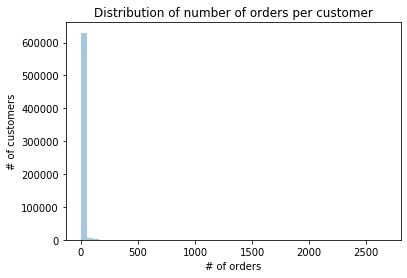

In [54]:
ax = sns.distplot(n_orders, kde=False, hist=True)
ax.set(title='Distribution of number of orders per customer',
       xlabel='# of orders', 
       ylabel='# of customers');

In [55]:
df1 = df[['user_id', 'Order ID', 'Date']].drop_duplicates()
df1.head()

,user_id,Order ID,Date
0,816103,12735126070,2018-08-13
3,303818,11125739425,2019-04-28
4,368330,11075462066,2018-11-29
6,377305,10144218272,2019-03-11
8,222364,11436027902,2019-04-23


**STEP 3 : After dropping the duplicates(if any), we create the cohort and order_month variables**

In [56]:
df1['Order_Month'] = df1['Date'].dt.to_period('M')
df1['Cohort'] = df1.groupby('user_id')['Date'] \
                 .transform('min') \
                 .dt.to_period('M') 
df1.head()

,user_id,Order ID,Date,Order_Month,Cohort
0,816103,12735126070,2018-08-13,2018-08,2018-08
3,303818,11125739425,2019-04-28,2019-04,2019-02
4,368330,11075462066,2018-11-29,2018-11,2018-08
6,377305,10144218272,2019-03-11,2019-03,2019-02
8,222364,11436027902,2019-04-23,2019-04,2018-08


**STEP 4 : Aggregate the data per cohort & order_month and then count No. of unique customers in each group. Adding period_number to indicate no. of periods between cohort month & month of the purchase**

In [59]:
from operator import attrgetter

df1_cohort = df1.groupby(['Cohort', 'Order_Month']) \
              .agg(n_customers=('user_id', 'nunique')) \
              .reset_index(drop=False)
df1_cohort['Period_Number'] = (df1_cohort.Order_Month - df1_cohort.Cohort).apply(attrgetter('n'))
df1_cohort.head()

,Cohort,Order_Month,n_customers,Period_Number
0,2018-08,2018-08,141078,0
1,2018-08,2018-09,54087,1
2,2018-08,2018-10,55426,2
3,2018-08,2018-11,54284,3
4,2018-08,2018-12,55211,4


**STEP 5 : Pivoting the df1_cohort table in a way that each row contains information about a given cohort and each column contains values for a certain period**

In [62]:
cohort_pivot = df1_cohort.pivot_table(index = 'Cohort',
                                     columns = 'Period_Number',
                                     values = 'n_customers')
cohort_pivot

Period_Number,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Cohort,,,,,,,,,,,,,,,,,,,,,
2018-08,141078.0,54087.0,55426.0,54284.0,55211.0,55279.0,51744.0,54969.0,54278.0,55314.0,...,55503.0,53766.0,55342.0,55162.0,52927.0,55376.0,54127.0,55324.0,54243.0,55101.0
2018-09,84053.0,23269.0,22586.0,23480.0,23068.0,21661.0,23081.0,22496.0,23388.0,22876.0,...,22721.0,23350.0,23184.0,22091.0,23212.0,22599.0,23187.0,22940.0,23244.0,NaN
2018-10,62984.0,13930.0,14393.0,14310.0,13167.0,14198.0,13818.0,14277.0,13734.0,14122.0,...,14045.0,14238.0,13354.0,14361.0,13808.0,14238.0,13921.0,14188.0,NaN,NaN
2018-11,47186.0,8999.0,8846.0,8280.0,9259.0,8810.0,8937.0,8840.0,9049.0,9057.0,...,8993.0,8401.0,9196.0,8767.0,9093.0,8686.0,9008.0,NaN,NaN,NaN
2018-12,39504.0,6613.0,6199.0,6725.0,6653.0,6716.0,6572.0,6608.0,6842.0,6481.0,...,6298.0,6647.0,6307.0,6711.0,6405.0,6569.0,NaN,NaN,NaN,NaN
2019-01,32864.0,4450.0,4802.0,4801.0,4926.0,4909.0,4974.0,5009.0,4744.0,4923.0,...,4951.0,4786.0,4915.0,4836.0,5009.0,NaN,NaN,NaN,NaN,NaN
2019-02,25581.0,3511.0,3395.0,3495.0,3369.0,3541.0,3629.0,3440.0,3611.0,3388.0,...,3481.0,3603.0,3474.0,3529.0,NaN,NaN,NaN,NaN,NaN,NaN
2019-03,24272.0,2931.0,3020.0,3023.0,3112.0,3044.0,2862.0,3110.0,2977.0,3075.0,...,3134.0,2879.0,3000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04,20691.0,2341.0,2301.0,2428.0,2465.0,2432.0,2346.0,2280.0,2373.0,2472.0,...,2282.0,2384.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**STEP 6 : Obtaining retention matrix**

In [64]:
cohort_size = cohort_pivot.iloc[:,0]
retention_matrix = cohort_pivot.divide(cohort_size, axis = 0)
retention_matrix

Period_Number,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Cohort,,,,,,,,,,,,,,,,,,,,,
2018-08,1.0,0.383384,0.392875,0.384780,0.391351,0.391833,0.366776,0.389636,0.384738,0.392081,...,0.393421,0.381108,0.392279,0.391004,0.375161,0.392520,0.383667,0.392152,0.384489,0.390571
2018-09,1.0,0.276837,0.268711,0.279348,0.274446,0.257706,0.274601,0.267641,0.278253,0.272162,...,0.270318,0.277801,0.275826,0.262822,0.276159,0.268866,0.275862,0.272923,0.276540,NaN
2018-10,1.0,0.221167,0.228518,0.227201,0.209053,0.225422,0.219389,0.226677,0.218055,0.224216,...,0.222993,0.226057,0.212022,0.228010,0.219230,0.226057,0.221024,0.225264,NaN,NaN
2018-11,1.0,0.190713,0.187471,0.175476,0.196223,0.186708,0.189399,0.187344,0.191773,0.191943,...,0.190586,0.178040,0.194888,0.185797,0.192705,0.184080,0.190904,NaN,NaN,NaN
2018-12,1.0,0.167401,0.156921,0.170236,0.168413,0.170008,0.166363,0.167274,0.173198,0.164059,...,0.159427,0.168261,0.159655,0.169882,0.162135,0.166287,NaN,NaN,NaN,NaN
2019-01,1.0,0.135407,0.146117,0.146087,0.149890,0.149373,0.151351,0.152416,0.144352,0.149799,...,0.150651,0.145630,0.149556,0.147152,0.152416,NaN,NaN,NaN,NaN,NaN
2019-02,1.0,0.137250,0.132716,0.136625,0.131699,0.138423,0.141863,0.134475,0.141159,0.132442,...,0.136078,0.140847,0.135804,0.137954,NaN,NaN,NaN,NaN,NaN,NaN
2019-03,1.0,0.120756,0.124423,0.124547,0.128214,0.125412,0.117914,0.128131,0.122652,0.126689,...,0.129120,0.118614,0.123599,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04,1.0,0.113141,0.111208,0.117346,0.119134,0.117539,0.113383,0.110193,0.114688,0.119472,...,0.110289,0.115219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**STEP 7 : Creation of two heatmaps where Heatmap1 consists of Retention matrix & Heatmap 2 indicates the cohort size is using a white color**

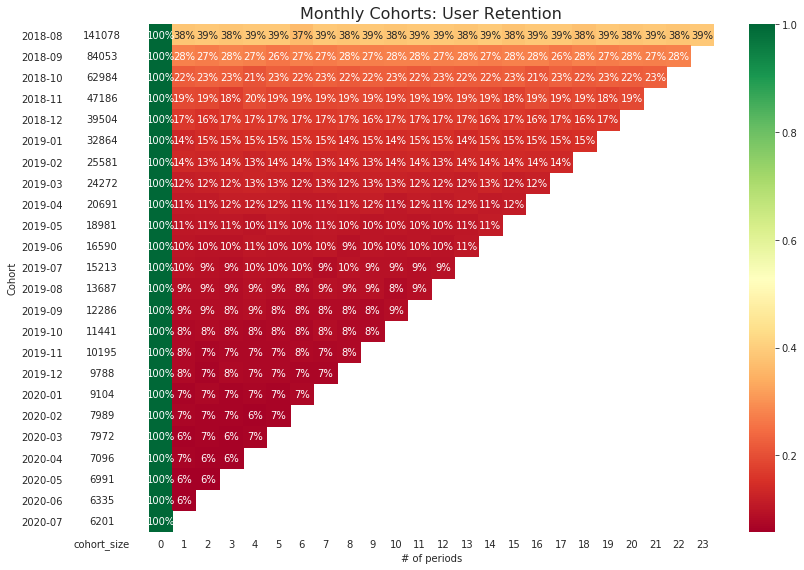

In [65]:
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors

with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
    
    # retention matrix
    sns.heatmap(retention_matrix, 
                mask=retention_matrix.isnull(), 
                annot=True, 
                fmt='.0%', 
                cmap='RdYlGn', 
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention', fontsize=16)
    ax[1].set(xlabel='# of periods',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                cmap=white_cmap, 
                ax=ax[0])

    fig.tight_layout()